# Correlated Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from impactstudy.experiment import (
    CorrelatedFeatureGenerator,
    CorrelatedLinearWithNoiseExperiment,
)

## Feature Generator

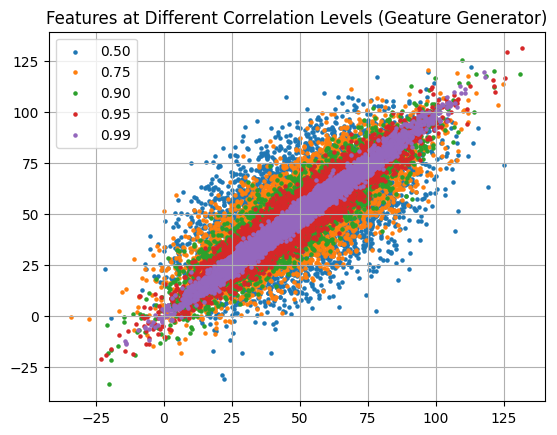

In [2]:
mu = 50.0
sigma = 20.0
corrs = [0.5, 0.75, 0.9, 0.95, 0.99]
n = 5_000

ax = plt.subplot()

for ii, corr in enumerate(corrs):
    cov = np.array(
        [
            [sigma * sigma, sigma * sigma * corr],
            [sigma * sigma * corr, sigma * sigma],
        ]
    )

    feature_generator = CorrelatedFeatureGenerator(cov, mu, 1, seed=17 * ii * ii * ii)

    df_x, df_c = feature_generator(n)

    ax.scatter(
        x=df_x["x_0"],
        y=df_c["c_0"],
        c=f"C{ii}",
        s=5,
        label=f"{corr:.2f}",
    )

    ax.grid()
    ax.legend()
    ax.set_title("Features at Different Correlation Levels (Geature Generator)")

## Experiment 

In [3]:
experiment = CorrelatedLinearWithNoiseExperiment(m=1, s=1, sigma=20.0, corr=corrs, n=n)

Text(0.5, 1.0, 'Features at Different Correlation Levels (Experiment)')

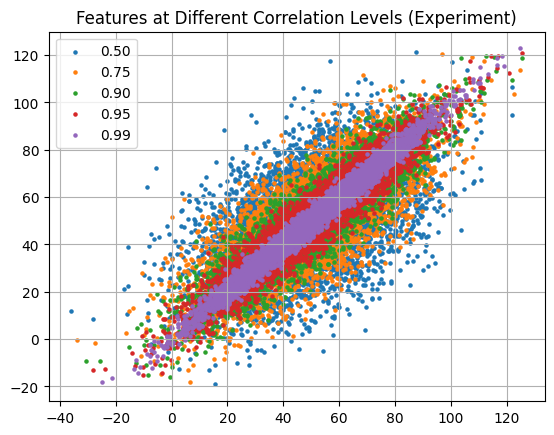

In [4]:
ax = plt.subplot()

for ii, (tags, scenario) in enumerate(experiment.scenarios()):
    corr = tags["corr"]
    df = scenario.training_data()

    ax.scatter(
        x=df["x_0"],
        y=df["c_0"],
        c=f"C{ii}",
        s=5,
        label=f"{corr:.2f}",
    )

ax.grid()
ax.legend()
ax.set_title("Features at Different Correlation Levels (Experiment)")